In [4]:
import pandas as pd
import pytz, datetime
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#path='DatosMexico/2020/Marzo/'
#filename=path+'DAT0203200825.txt'
path='DatosMexico/2020/Febrero/'
filename=path+'DAT2002201054.txt'

In [7]:
file_DS = open(filename[:-4]+"DS.txt", 'w+') #Nombra tu nuevo archivo DS.
file_ST = open(filename[:-4]+"ST.txt", 'w+') # Nombra tu nuevo archivo ST.
ocurrencias1 = []
ocurrencias2 = []
palabra1 = 'ST'
palabra2 = 'DS'
with open(filename) as lineas: # Abre archivo de Escaramujo
    flag=False
    for linea in lineas:
            if flag: 
                ocurrencias2.append(linea)
                flag=False 
            if palabra1 in linea:
                ocurrencias1.append(linea)
                flag=True 
 
       
for i, j in enumerate (ocurrencias1):
    #print(i, j)
    file_ST.write(str(j))

file_ST.close() 

for i, k in enumerate (ocurrencias2):
    #print i, k
    file_DS.write(str(k))

file_DS.close()

In [8]:
dec = open(filename[:-4]+"_deci.txt",'w') # Nombra tu nuevo archivo en decimal.
ST = '151020191311_DS.txt' # Tu archivo DS del programa de 'Busqueda_ST_DS'.
coincidencias = np.loadtxt(filename[:-4]+"DS.txt",delimiter= ' ',skiprows=2,usecols=[5],dtype=bytes).astype(str)

for i, j in enumerate (coincidencias):  
    k= int(j,16)
    #print i, k
    dec.write(str(k))
    dec.write("\n")
    
dec.close() 


In [9]:
coincidenciasF = open(filename[:-4]+"_final.txt",'w') # Nombra nuevo archivo final.
dec = filename[:-4]+"_deci.txt" # Llama archivo creado en 'Hexadecimal_Decimal'.
coincidencias = np.loadtxt(dec,delimiter= ' ',usecols=[0],dtype=bytes).astype(str)
ST = filename[:-4]+"ST.txt" # Llama archivo creado en 'Busqueda_ST_DS'.
hora = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[5],dtype=bytes).astype(str)
fecha = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[6],dtype=bytes).astype(str)

Titulo= 'Fecha,Hora,Coincidencias\n'
#print Titulo
coincidenciasF.write (str(Titulo))
print(hora)
for i in range(len(hora)):
    test = int(hora[i])
     #print(test)
    data = fecha[i] + "," + hora[i] + "," + coincidencias[i] 
        #print(data)
    coincidenciasF.write(str(data))
    coincidenciasF.write("\n") 
         
coincidenciasF.close()
print(fecha)


['165716' '165816' '165916' ... '142319' '142419' '142520']
['200220' '200220' '200220' ... '020320' '020320' '020320']


In [15]:
datos= pd.read_csv(filename[:-4]+"_final.txt", dtype={'Fecha': 'str','Hora': 'str'})
datos= datos.iloc[1:]
df=pd.DataFrame(datos)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15643 entries, 1 to 15643
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          15643 non-null  object
 1   Hora           15643 non-null  object
 2   Coincidencias  15643 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 366.8+ KB


,Fecha,Hora,Coincidencias
1,200220,165816,74
2,200220,165916,85
3,200220,170016,76
4,200220,170116,91
5,200220,170216,72


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15643 entries, 2020-02-20 16:58:16 to 2020-03-02 14:25:20
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          15643 non-null  object
 1   Hora           15643 non-null  object
 2   Coincidencias  15643 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 488.8+ KB


In [29]:
df['datetime']=pd.to_datetime(df['Fecha'] +df['Hora'], format='%d%m%y%H%M%S')
df.set_index(['datetime'],drop=True, inplace=True)
flag=np.logical_and(df.index>"2020-01-01",df.index<"2020-12-28 ")

In [30]:
len(flag)

15643

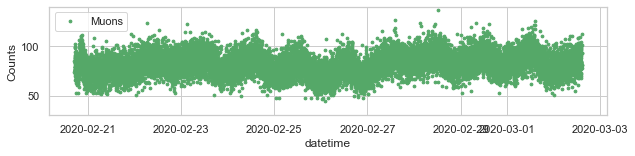

In [36]:
fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
axes =df['Coincidencias'][flag].plot(marker='.',markersize=5.5, ylim=(30,140),linestyle='None',legend=True,  label='Muons',alpha=1,color='g', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
plt.show()


In [37]:
myarray = np.asarray(coincidencias)

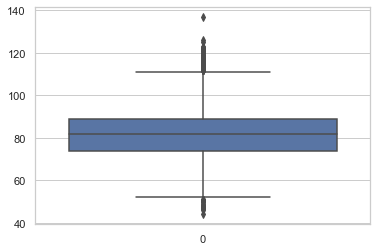

In [38]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(data=myarray)
#plt.savefig("Escaramujocoincidencias.png", bbox_inches='tight')